In [1]:
#SETTING PATH 
path="/sharedFolder/Data/1_HTGTS/13_Revision1/"
previousResults="/sharedFolder/Results/Hotspot/Revision1/FULL/6/"
results="/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL/"
dir.create(results,recursive=TRUE)
riderPath="/home/Riderv2/"
#LOAD USEFULL FUNCTIONS 
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
#LOAD LIBRARIES 
library("argparser");
library(gtools);
library("GenomicRanges");
library("ggVennDiagram");
library("ggplot2")
library(eulerr)
options(warn=-1)
library(GenomicRanges)

Warning message in dir.create(results, recursive = TRUE):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL' already exists”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: Geno

In [2]:
#Load Data
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})

In [3]:
conditions=c("DMSO","Taze","Vale")
tempWT=Database[grep("WT",Database[,6]),]
tempIde=Database[grep("Idelalisib",Database[,6]),]
ll=list()
lll=list()
count=0
for(i in conditions){
count=count+1
wt=tempWT[grep(i,tempWT[,6]),]
id=tempIde[grep(i,tempIde[,6]),]
wt1=wt[,7]
names(wt1)=wt[,6]
id1=id[,7]
names(id1)=id[,6]    
fit1 <- euler(c("WT" = length(setdiff(wt1,id1)), "Ide" = length(setdiff(id1,wt1)), "WT&Ide" = length(intersect(wt1,id1))))
ll[[count]]=fit1
lll[[count]]=unique(union(wt1,id1))
}
names(lll)=conditions

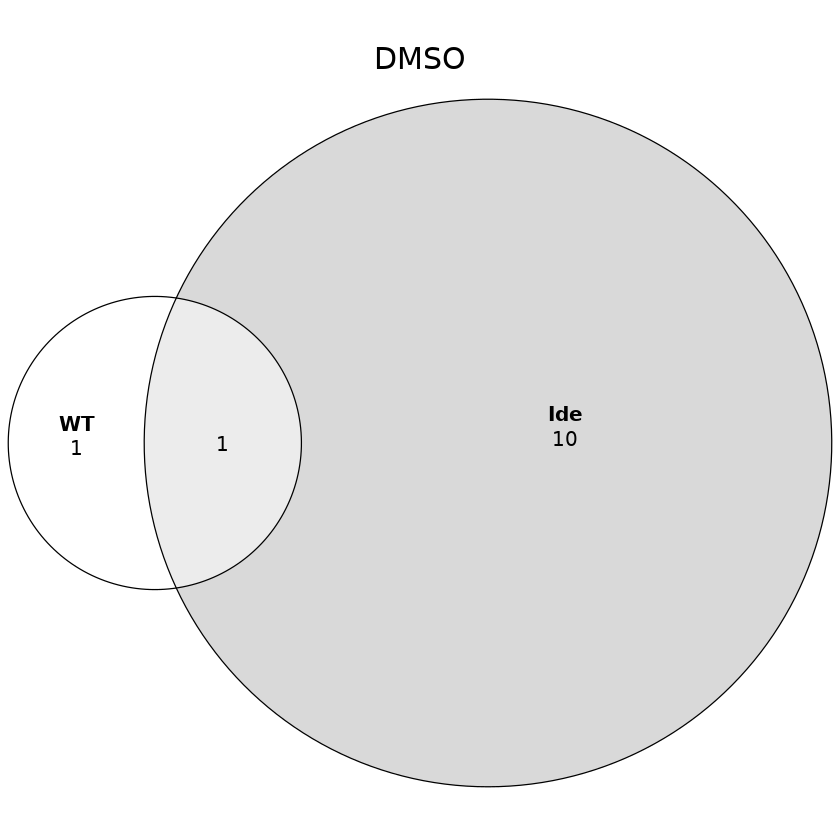

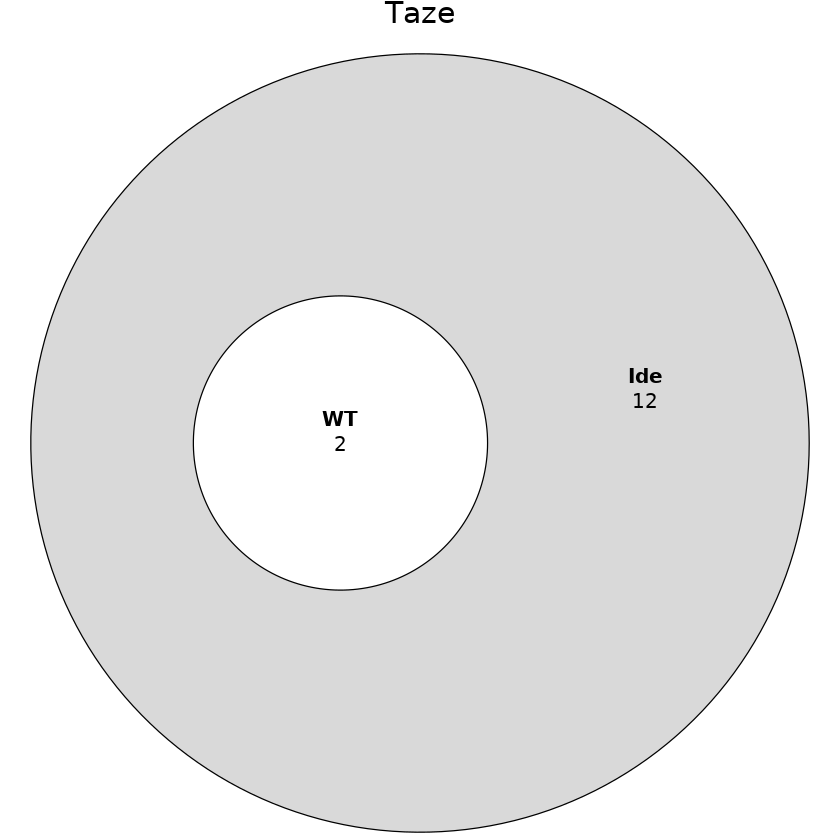

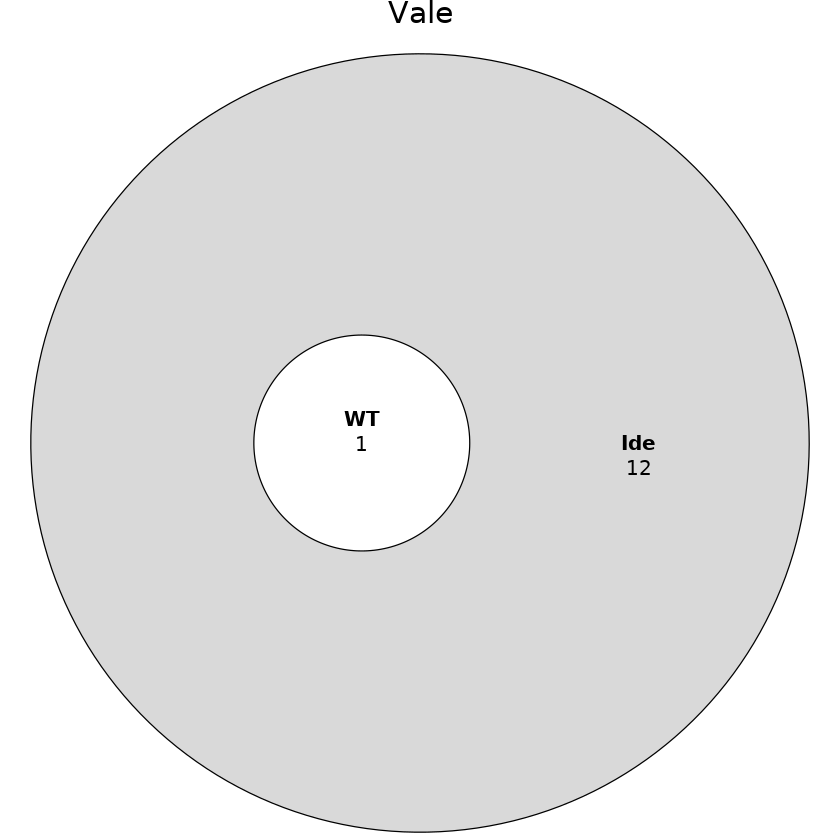

In [4]:



plot(ll[[1]],quantities = TRUE,main=conditions[1])
plot(ll[[2]],quantities = TRUE,main=conditions[2])
plot(ll[[3]],quantities = TRUE,main=conditions[3])


In [9]:
WTSPEC=setdiff(tempWT[,7],tempIde[,7])
COMMON=intersect(tempWT[,7],tempIde[,7])
IDESPEC=setdiff(tempIde[,7],tempWT[,7])
heatmap=read.table(paste(results,"/RPMCOmparison/rpm_hgtgtsHeatmapDMSO6.csv",sep=""),header=TRUE,row.names=1,sep=",")
dim(heatmap)
#write.table(heatmap[sapply((c(IDESPEC,COMMON,WTSPEC)),FUN=toString),],"/sharedFolder/Results/Idelalisib/RPMCOmparison/rpm_hgtgtsHeatmapDIVIDED.csv",col.names=NA,sep=",")

[1] 22  9

In [10]:
ll=list()
count=0
for(i in conditions){
count=count+1
    tmp=heatmap[,grep(i,colnames(heatmap))]+1
ll[[count]]=log2(tmp[,3]/tmp[,1])
print(length(which(ll[[count]]>0))/length(ll[[count]])*100)
print(length(which(ll[[count]]==0))/length(ll[[count]])*100)
print(length(which(ll[[count]]<0))/length(ll[[count]])*100)

}
lfc=sapply(ll,FUN=cbind)
colnames(lfc)=conditions
write.table(lfc,paste(results,"/RPMCOmparison/lfcBoxplot6.txt",sep=""),sep="\t",col.names=TRUE,row.names=FALSE)


[1] 68.18182
[1] 9.090909
[1] 22.72727
[1] 77.27273
[1] 4.545455
[1] 18.18182
[1] 86.36364
[1] 0
[1] 13.63636


In [11]:
for(i in conditions){
    tmp=heatmap[,grep(i,colnames(heatmap))]
    tmp=tmp[as.character(lll[[i]]),]
    tmp=tmp[sort(tmp[,3],index.return=TRUE,decreasing=TRUE)$ix,]
    write.table(tmp, paste(results,"/RPMCOmparison/",i,"rpm_FAIR6.csv",sep=""),sep=",",col.names=NA)
}
    
    #
    #sort()


In [18]:
WTSPEC

[1] 1

In [19]:
COMMON

[1] 135 151 149 147

In [20]:
IDESPEC

[1]  89 133 136 137 144  96 152 129 108 132 116 117 118 119 120 156 131 139 141
[20] 142 143 148 157